<a href="https://colab.research.google.com/github/bhuvanameganathan10/Predictive-sentiment-analysis/blob/main/M3_MP3_NB_Healthcare_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project: Healthcare classification

## About Dataset
###Context:
This synthetic healthcare dataset has been created to serve as a valuable resource for data science, machine learning, and data analysis enthusiasts. It is designed to mimic real-world healthcare data, enabling users to practice, develop, and showcase their data manipulation and analysis skills in the context of the healthcare industry.

###Inspiration:
The inspiration behind this dataset is rooted in the need for practical and diverse healthcare data for educational and research purposes. Healthcare data is often sensitive and subject to privacy regulations, making it challenging to access for learning and experimentation. To address this gap, I have leveraged Python's Faker library to generate a dataset that mirrors the structure and attributes commonly found in healthcare records. By providing this synthetic data, I hope to foster innovation, learning, and knowledge sharing in the healthcare analytics domain.

###Dataset Information:
Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset


* **Name**: This column represents the name of the patient associated with the
healthcare record.
* **Age**: The age of the patient at the time of admission, expressed in years.
* **Gender**: Indicates the gender of the patient, either "Male" or "Female."
* **Blood Type**: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).
* **Medical Condition**: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.
* **Date of Admission**: The date on which the patient was admitted to the healthcare facility.
* **Doctor**: The name of the doctor responsible for the patient's care during their admission.
* **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.
* **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."
* **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
* **Room Number**: The room number where the patient was accommodated during their admission.
* **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.
* **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.
* **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."
* **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

In [13]:
#@title Download dataset
!gdown "1x6Lt9hOEkkAWar0Epz-HM8Dgjk0kUKlX&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1x6Lt9hOEkkAWar0Epz-HM8Dgjk0kUKlX&confirm=t
To: /content/healthcare_dataset.csv
100% 8.40M/8.40M [00:00<00:00, 64.5MB/s]


## Import Libraries

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import necessary libraries for machine learning
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder #Label Encoder/One Hot Encoder
from sklearn.metrics import confusion_matrix #Confusion Matrix

## Load the csv file ( 1 Mark)

In [15]:
# read the data
df = pd.read_csv('healthcare_dataset.csv')

In [16]:
# Print the top 5 data points
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

## Data Exploration ( 2 Marks)

In [17]:
# Print the type of data points
print(df.dtypes)

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [19]:
# Print the shape of data points
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (55500, 15)


In [26]:
# Print the missing values of each data point
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)




Missing values in each column:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [36]:
# Identify and Print the numerical and categorical features

# Identify and print the numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical features:")
print(numerical_features)

# Identify and print the categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print("\nCategorical features:")
print(categorical_features)

Numerical features:
Index(['Age', 'Billing Amount', 'Room Number'], dtype='object')

Categorical features:
Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')


## Data Visualization ( 2 Marks)

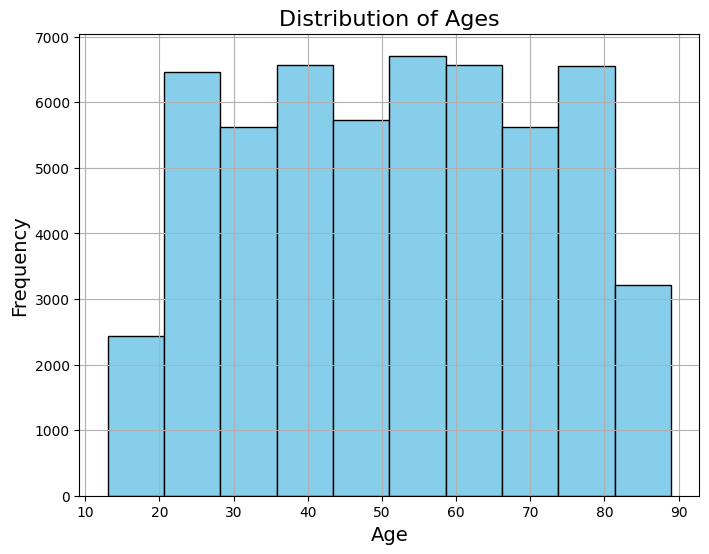

In [38]:
# Display the distribution of ages in histogram
plt.figure(figsize=(8, 6))

# Plot the histogram of the 'Age' column
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.grid(True)
plt.show()

In [39]:
# Analyzing categories count of Target column

# Analyze and print the count of each category in the target column
category_counts = df['Test Results'].value_counts()

# Display the category counts
print("Category counts of 'Test Results':")
print(category_counts)


Category counts of 'Test Results':
Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


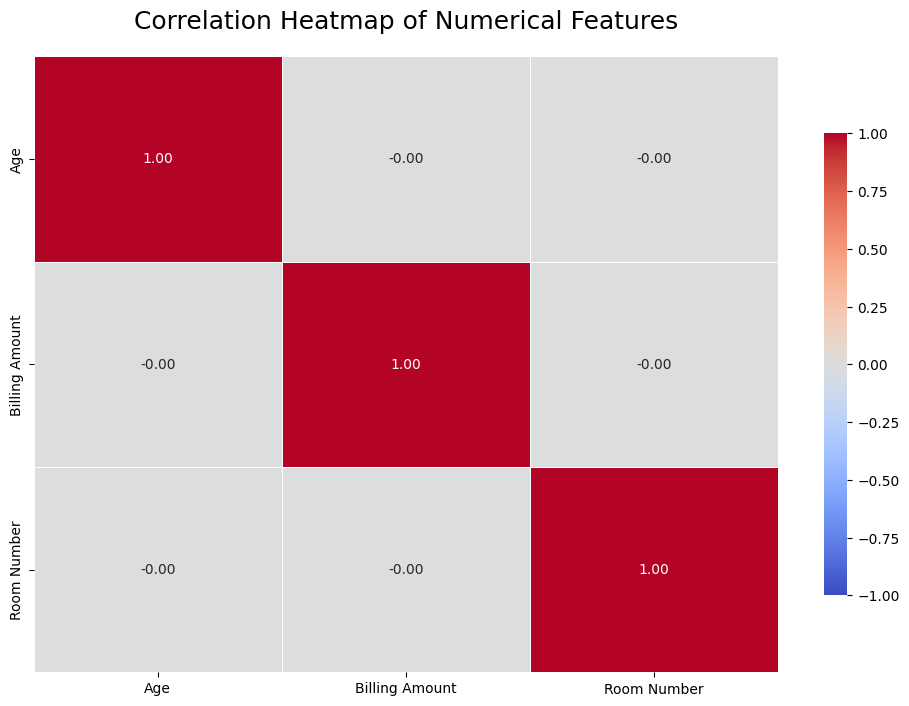

In [44]:

# YOUR CODE HERE: Increase the size of the heatmap.
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# YOUR CODE HERE: Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
# YOUR CODE HERE: Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

# 1. Identify the numerical columns
numeric_data = df.select_dtypes(include=['number'])

# 2. Compute the correlation matrix of the numerical data
correlation_matrix = numeric_data.corr()

# 3. Create the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap with the range of values from -1 to 1, annotations set to True
heatmap = sns.heatmap(correlation_matrix,
                      cmap='coolwarm',          # Colormap to use
                      vmin=-1, vmax=1,          # Set the range of the values displayed on the colormap
                      annot=True,               # Display the correlation values on the heatmap
                      fmt='.2f',                # Format the annotation to 2 decimal places
                      linewidths=0.5,           # Lines between cells
                      cbar_kws={'shrink': 0.75})  # Control the colorbar size

# 4. Add a title with padding
heatmap.set_title('Correlation Heatmap of Numerical Features', fontsize=18, pad=20)

# 5. Display the heatmap
plt.show()


## Preprocessing Data ( 2 Marks)

In [46]:
# Convert the categorical data to numerical :Label Encoding
# YOUR CODE HERE:
def encode_features(dataframe):
   # Initialize a LabelEncoder instance
    label_encoder = LabelEncoder()

    # Identify categorical columns in the dataframe
    categorical_columns = dataframe.select_dtypes(include=['object']).columns

    # Apply LabelEncoder to each categorical column
    for col in categorical_columns:
        dataframe[col] = label_encoder.fit_transform(dataframe[col])

    return dataframe

# Encode categorical features in the DataFrame
encoded_data = encode_features(df)

# Display the encoded DataFrame
print(encoded_data)

        Name  Age  Gender  Blood Type  Medical Condition  Date of Admission  \
0       3068   30       1           5                  2               1729   
1      15211   62       1           0                  5                104   
2       6476   76       0           1                  5               1233   
3      26935   28       0           6                  3                560   
4      26241   43       0           2                  2               1230   
...      ...  ...     ...         ...                ...                ...   
55495  32416   42       0           6                  1                466   
55496  13686   61       0           3                  5                260   
55497   8742   38       0           4                  4                432   
55498   9759   43       1           7                  0                 17   
55499  34215   53       0           6                  0               1791   

       Doctor  Hospital  Insurance Provider  Billin

In [47]:
# Apply One Hot Encoding on 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication'

def apply_one_hot_encoding(dataframe):
    # Specify the columns to apply One-Hot Encoding
    columns_to_encode = ['Blood Type', 'Medical Condition', 'Admission Type', 'Medication']

    # Apply One-Hot Encoding using pd.get_dummies()
    dataframe = pd.get_dummies(dataframe, columns=columns_to_encode, drop_first=True)

    return dataframe

# Apply One-Hot Encoding on the specified columns
df_encoded = apply_one_hot_encoding(df)

# Display the encoded DataFrame
print(df_encoded)

        Name  Age  Gender  Date of Admission  Doctor  Hospital  \
0       3068   30       1               1729   26612     29933   
1      15211   62       1                104   33648     16012   
2       6476   76       0               1233   37828      5473   
3      26935   28       0                560   22511     12317   
4      26241   43       0               1230   21259     33598   
...      ...  ...     ...                ...     ...       ...   
55495  32416   42       0                466   20003     15553   
55496  13686   61       0                260   37149     31722   
55497   8742   38       0                432   18550     37408   
55498   9759   43       1                 17   22665     14329   
55499  34215   53       0               1791   10782     12207   

       Insurance Provider  Billing Amount  Room Number  Discharge Date  ...  \
0                       1    18856.281306          328            1730  ...   
1                       3    33643.327287        

In [52]:
# Identify and Drop the columns which are not useful for prediction of health

def drop_useless_columns(dataframe):
    # Step 1: List of columns to drop based on domain knowledge or analysis
    columns_to_drop = [
        'Name',  # Unique identifier, not useful for prediction
        'Date of Admission',  # Likely not useful unless time-based prediction is required
        'Doctor',  # Might be too specific or not relevant for prediction unless doctor behavior is important
        'Hospital',  # Might not contribute directly to prediction
        'Room Number',  # Room number doesn't affect health prediction directly
        # Add other columns you identify as irrelevant
    ]

    # Step 2: Drop constant columns (columns with a single unique value)
    dataframe = dataframe.loc[:, dataframe.nunique() > 1]  # Keep only columns with more than one unique value

    # Step 3: Drop the specified columns from the dataframe
    dataframe = dataframe.drop(columns=columns_to_drop, axis=1, errors='ignore')

    # Step 4: Handle missing values, drop columns with too many missing values (e.g., >50% missing)
    missing_threshold = 0.5  # Drop columns with more than 50% missing data
    dataframe = dataframe.loc[:, dataframe.isnull().mean() < missing_threshold]

    return dataframe

# Drop useless columns from the DataFrame
#df_cleaned = drop_useless_columns(df_encoded)

# Display the cleaned DataFrame
#print(df_cleaned)

# Apply the drop_useless_columns function to the DataFrame
df_cleaned = drop_useless_columns(df)

# Display the cleaned DataFrame
print(df_cleaned)

       Age  Gender  Blood Type  Medical Condition  Insurance Provider  \
0       30       1           5                  2                   1   
1       62       1           0                  5                   3   
2       76       0           1                  5                   0   
3       28       0           6                  3                   3   
4       43       0           2                  2                   0   
...    ...     ...         ...                ...                 ...   
55495   42       0           6                  1                   1   
55496   61       0           3                  5                   2   
55497   38       0           4                  4                   4   
55498   43       1           7                  0                   3   
55499   53       0           6                  0                   0   

       Billing Amount  Admission Type  Discharge Date  Medication  \
0        18856.281306               2            1730 

## Train/Test split dataset ( 1 Mark)

In [53]:
# YOUR CODE HERE : Create X and y data

# YOUR CODE HERE : Split the Data using sklearn


# Step 1: Define the target variable (y) and features (X)
# let's assume we are trying to predict the 'Medical Condition'
X = df_cleaned.drop(columns=['Medical Condition'])  # All columns except 'Medical Condition'
y = df_cleaned['Medical Condition']  # The target variable

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits to verify
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (44400, 9)
Testing Features Shape: (11100, 9)
Training Target Shape: (44400,)
Testing Target Shape: (11100,)


## Model Training ( 2 Marks)

* Train you model on any 3 algorithms and predict the test data
* Confusion matrix
* Classification report

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Step 1: Initialize the models
log_reg = LogisticRegression(max_iter=10000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(random_state=42)

# Step 2: Train the models on the training data
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(random_state=42)

In [63]:
# Predict the model on test data
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)
svm_clf_pred = svm_clf.predict(X_test)

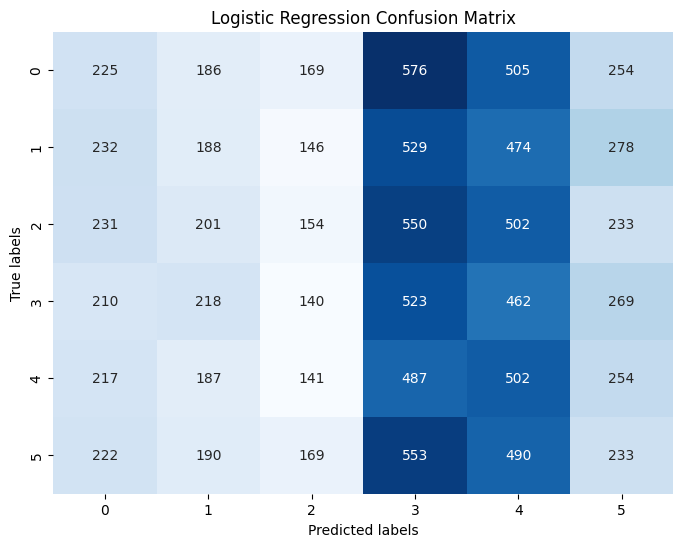

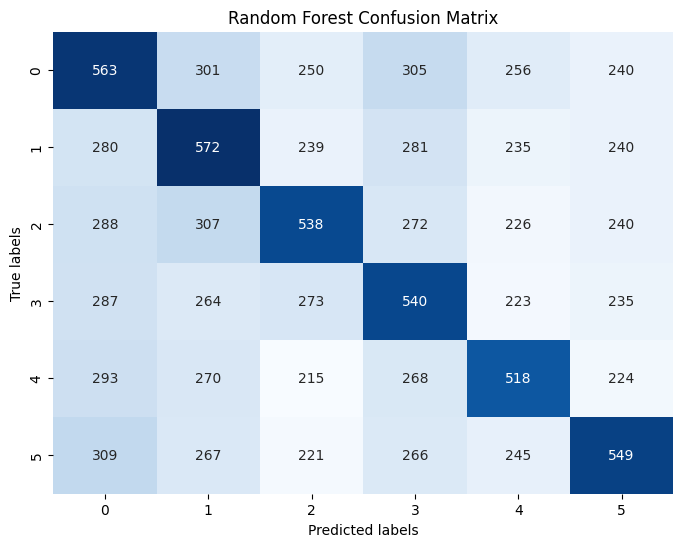

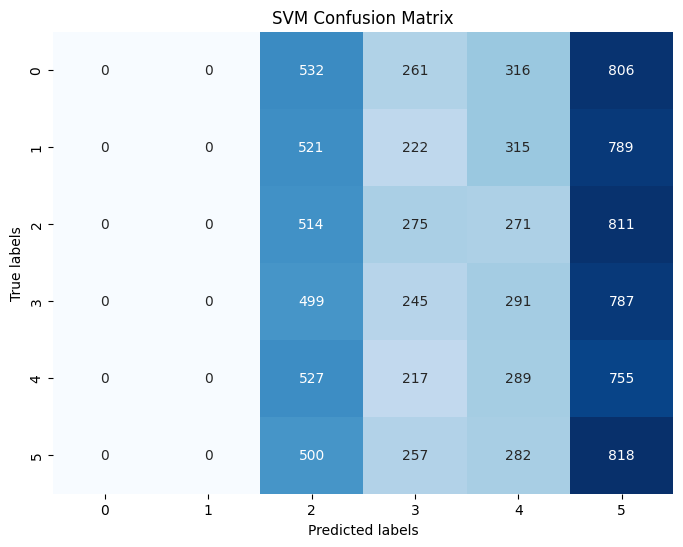

In [61]:
# YOUR CODE HERE: To visualise the confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Calculate confusion matrix for each model
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
rf_clf_cm = confusion_matrix(y_test, rf_clf_pred)
svm_clf_cm = confusion_matrix(y_test, svm_clf_pred)

# Step 2: Create a function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Step 3: Visualize confusion matrices for each model
# Logistic Regression Confusion Matrix
plot_confusion_matrix(log_reg_cm, title='Logistic Regression Confusion Matrix')

# Random Forest Confusion Matrix
plot_confusion_matrix(rf_clf_cm, title='Random Forest Confusion Matrix')

# SVM Confusion Matrix
plot_confusion_matrix(svm_clf_cm, title='SVM Confusion Matrix')

In [65]:
# YOUR CODE HERE: To print the classification report

# Evaluate the models
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
rf_clf_accuracy = accuracy_score(y_test, rf_clf_pred)
svm_clf_accuracy = accuracy_score(y_test, svm_clf_pred)

def evaluate_model(model, X_test, y_test):
    # Step 1: Predict the labels on the test set
    y_pred = model.predict(X_test)

    # Step 2: Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Print classification reports for detailed metrics (precision, recall, f1-score)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))

print("Random Forest Accuracy:", rf_clf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_clf_pred))

print("SVM Accuracy:", svm_clf_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, svm_clf_pred))

Logistic Regression Accuracy: 0.16441441441441443
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.12      0.14      1915
           1       0.16      0.10      0.12      1847
           2       0.17      0.08      0.11      1871
           3       0.16      0.29      0.21      1822
           4       0.17      0.28      0.21      1788
           5       0.15      0.13      0.14      1857

    accuracy                           0.16     11100
   macro avg       0.16      0.17      0.16     11100
weighted avg       0.16      0.16      0.15     11100

Random Forest Accuracy: 0.2954954954954955
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.29      0.29      1915
           1       0.29      0.31      0.30      1847
           2       0.31      0.29      0.30      1871
           3       0.28      0.30      0.29      1822
           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Report Your Observations

In [ ]:
 # Your Observations here in text:
 Random Forest is generally the best choice for this task based on the provided evaluation metrics.
 It provides the best overall performance in terms of accuracy, precision, recall, and F1-score.